# Model evaluation

In [1]:
import pandas as pd
from src.utils.functions import load_params, get_abs_path
from matplotlib import pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format='retina'

In [2]:
params = load_params()
evaluation_hist_path = get_abs_path(params["model"]["report_path"],
                                    params["model"]["eval_hist_file"])
model_perfomance_path = get_abs_path(params["model"]["report_path"],
                                     params["model"]["model_performance_file"])

## Training stage

In [3]:
eval_hist = pd.read_csv(evaluation_hist_path, index_col=0)

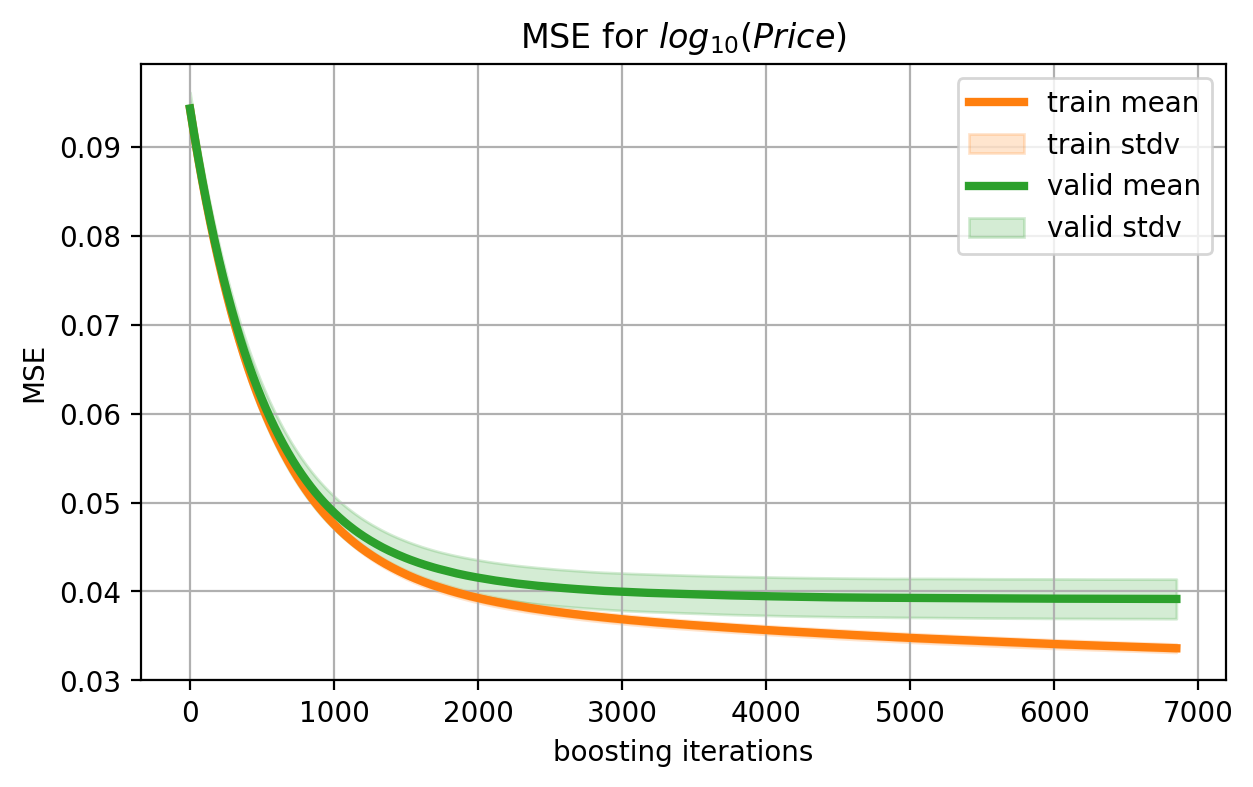

In [4]:
plt.figure(figsize=(7, 4))

plt.plot(eval_hist["train l2-mean"], label="train mean", lw=3, color="C1")
plt.fill_between(eval_hist.index,
                 eval_hist["train l2-mean"] + eval_hist["train l2-stdv"],
                 eval_hist["train l2-mean"] - eval_hist["train l2-stdv"],
                 label="train stdv",
                 color="C1",
                 alpha=.2)
plt.plot(eval_hist["valid l2-mean"], label="valid mean", lw=3, color="C2")
plt.fill_between(eval_hist.index,
                 eval_hist["valid l2-mean"] + eval_hist["valid l2-stdv"],
                 eval_hist["valid l2-mean"] - eval_hist["valid l2-stdv"],
                 label="valid stdv", color="C2", alpha=0.2)
plt.grid(True)
plt.title(r"MSE for $log_{10}(Price)$")
plt.ylabel("MSE")
plt.xlabel("boosting iterations")
plt.legend()
plt.show()

## Test

In [5]:
performance = pd.read_csv(model_perfomance_path)

In [6]:
performance.T

,0
r2,0.573015
mae,33.580244
mape,0.372473
rmse,56.023770
